In [1]:
pip install matplotlib
pip install seaborn

SyntaxError: invalid syntax (370712082.py, line 1)

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar


ModuleNotFoundError: No module named 'seaborn'

In [4]:
#import matplotlib
print(matplotlib.__file__)

NameError: name 'matplotlib' is not defined

In [6]:
import sys
print(sys.executable)

C:\Users\ramad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe


# Loading and pre-processing of data

In [2]:
df=pd.read_csv(r"D:\INTERNSHIP\TeAM\Tasla_Stock_Updated_V2.csv",index_col=0)
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [3]:
df.dropna(inplace=True)
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

c:\Users\Swapn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


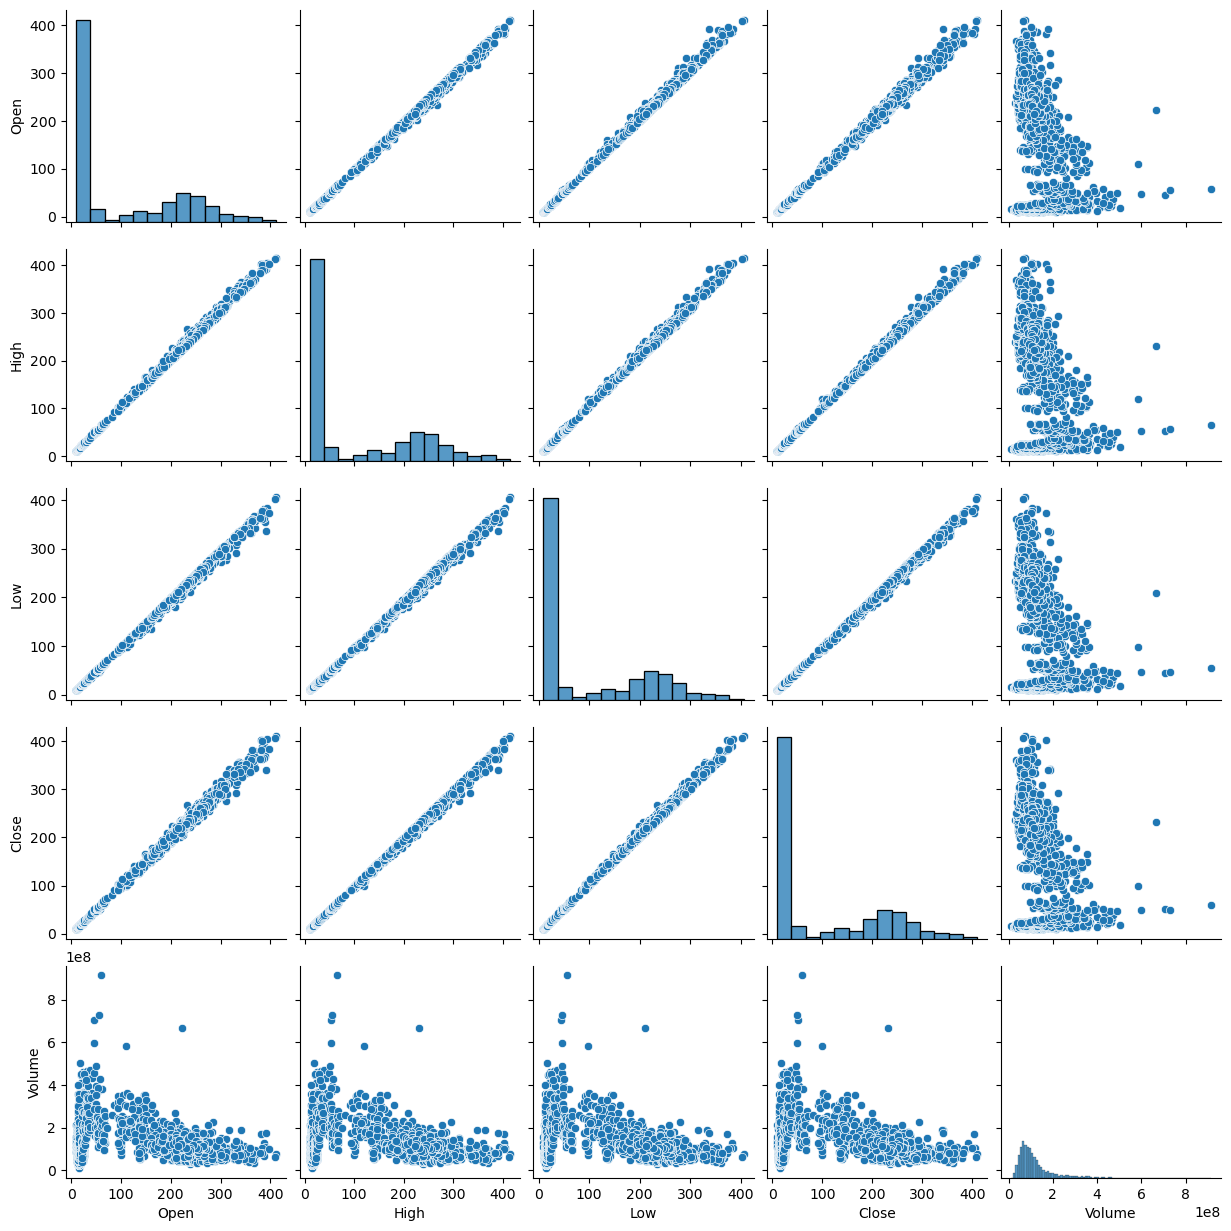

In [4]:
df.Date=pd.to_datetime(df.Date)
sns.pairplot(df)

In [5]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,2274,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,2019-07-09 01:31:11.240105472,103.493730,105.771617,101.036327,103.461794,1.142089e+08
min,2015-01-02 00:00:00,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,2017-04-05 06:00:00,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,2019-07-10 12:00:00,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,2021-10-10 06:00:00,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,2024-01-16 00:00:00,411.470001,414.496674,405.666656,409.970001,9.140820e+08
std,NaN,111.136174,113.606095,108.399966,111.032019,7.688430e+07


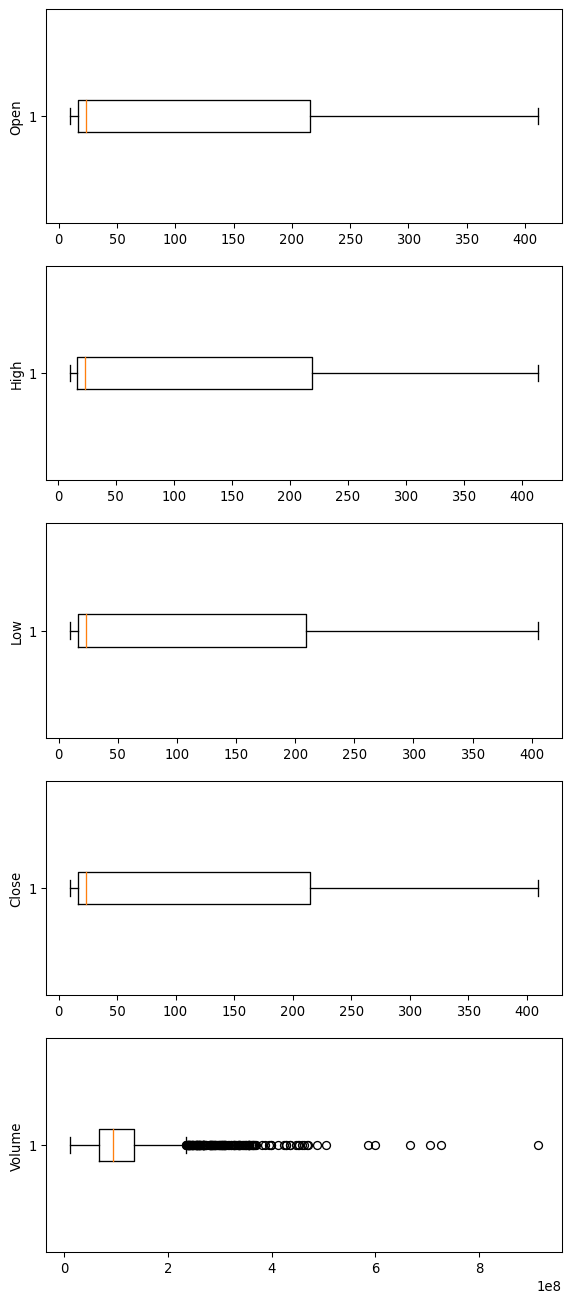

In [7]:
# Box Plots
fig, axs = plt.subplots(5,1,dpi=95, figsize=(7,17))
i = 0
j=0
for col in df.columns:
  if j==1:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
  j=1
plt.show()

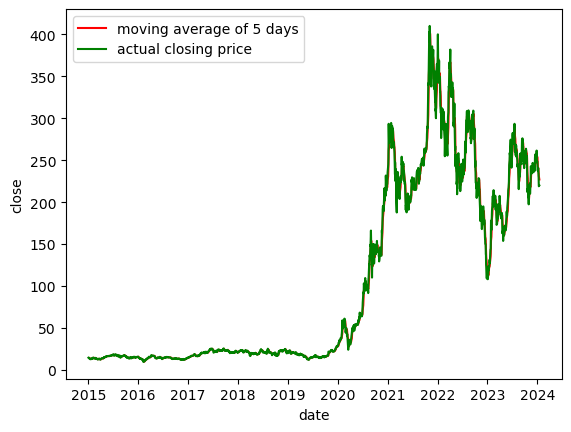

        Date       Open       High        Low      Close    Volume  \
0 2015-01-02  14.858000  14.883333  14.217333  14.620667  71466000   
1 2015-01-05  14.303333  14.433333  13.810667  14.006000  80527500   
2 2015-01-06  14.004000  14.280000  13.614000  14.085333  93928500   
3 2015-01-07  14.223333  14.318667  13.985333  14.063333  44526000   
4 2015-01-08  14.187333  14.253333  14.000667  14.041333  51637500   

   Close_before_1     ma_100  Is_Holiday  
0             NaN        NaN       False  
1      71466000.0        NaN       False  
2      80527500.0        NaN       False  
3      93928500.0        NaN       False  
4      44526000.0  14.163333       False  


In [8]:
#Task 1

# Lagged Variables
lag = 1  # Define the lag periods
df[f'Close_before_{lag}'] = df[col].shift(lag)

# Rolling Statistics
df['ma_100']=df.Close.rolling(5).mean()
plt.plot(df.Date,df.ma_100,'r',df.Date,df.Close,'g')
plt.ylabel('close')
plt.xlabel('date')
plt.legend(['moving average of 5 days','actual closing price'])
plt.show()

# Holiday Indicator
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())
df['Is_Holiday'] = df['Date'].isin(holidays)


# Display the updated DataFrame with new features
print(df.head())


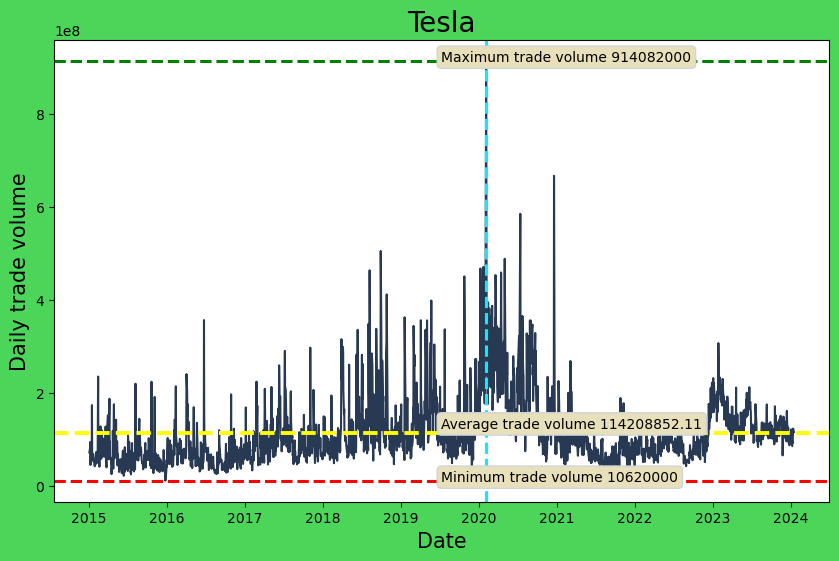

In [9]:
# x and y coords for average trade volume
ave_x = df['Date'].mean()
ave_y = df['Volume'].mean()
# y coord for max trade vol
max_y = df['Volume'].max()
# y coord for min trade vol
min_y = df['Volume'].min()

fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
ax.plot(df['Date'], df['Volume'], color='#283954')
ax.set_title("Tesla", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade volume", fontsize=15)
ax.axhline(y=df['Volume'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Volume'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Volume'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade volume {round(df['Volume'].mean(),2)}", 
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade volume {df['Volume'].max()}", 
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade volume {df['Volume'].min()}", 
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()

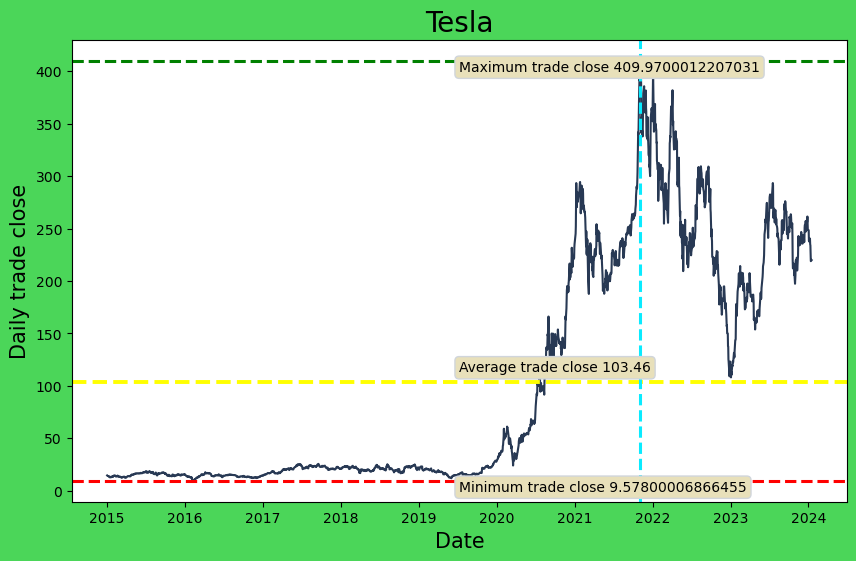

In [10]:
# x and y coords for average trade close
ave_x = df['Date'].mean()
ave_y = df['Close'].mean()
# y coord for max trade close
max_y = df['Close'].max()
# y coord for min trade close
min_y = df['Close'].min()

fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
ax.plot(df['Date'], df['Close'], color='#283954')
ax.set_title("Tesla", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily trade close", fontsize=15)
ax.axhline(y=df['Close'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=df['Close'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=df['Close'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.axvline(x=df[df['Close'] == max_y]['Date'].values, ls='--', lw='2.2', color='#0aebff')
ax.annotate(f"Average trade close {round(df['Close'].mean(),2)}", 
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Maximum trade close {df['Close'].max()}", 
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
ax.annotate(f"Minimum trade close {df['Close'].min()}", 
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
plt.show()


In [11]:
data_train=pd.DataFrame(df.Close[0:int(len(df)*0.8)])
data_test=pd.DataFrame(df.Close[int(len(df)*0.8):])
data_train.shape[0],data_test.shape[0]

(1819, 455)

In [23]:
# Task 2 (additional domain features extraction)
df['diff_closing']=df['Close'].diff(1)
df['diff_volume']=df['Volume'].diff(1)

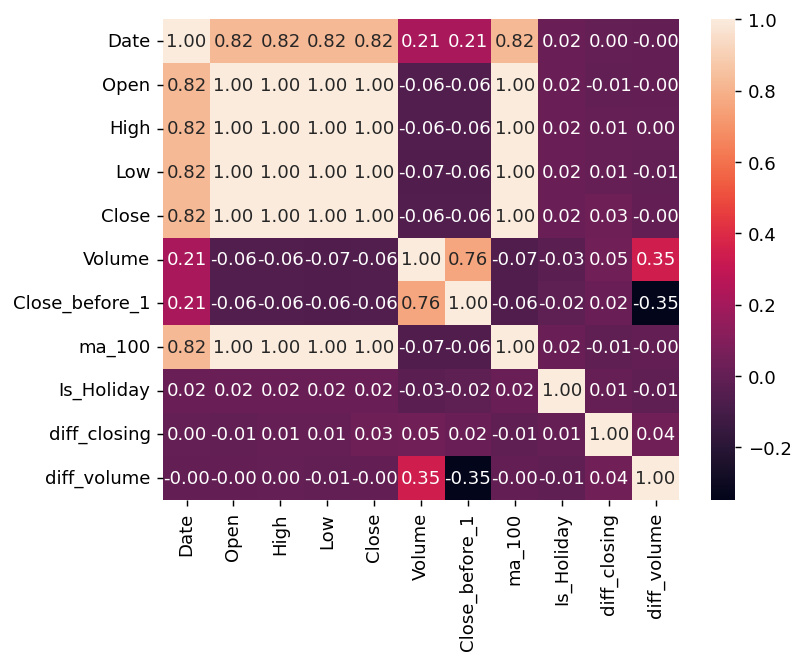

In [24]:
#Task 3
#correlation
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()